<a href="https://colab.research.google.com/github/janhavi-giri/Clustering/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Example Implementation of K-Means Clustering**

 Adapted from a tutorial which itself is based on an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas. The content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

 # K-Means Clustering, as implemented in ``sklearn.cluster.KMeans``.

# We begin with the standard imports:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

## Generate synthetic data

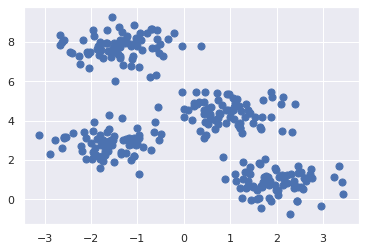

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

### Exercise: Use *k*-means with *k* = 4 on the synthetic data generated above

In [ ]:
from sklearn.cluster import KMeans
# Instantiate the KMeans object with 4 clusters
kmeans = KMeans(n_clusters=4)
# Train the model on the features you just generated
kmeans.fit(X)
# Make predictions with those same features
y_kmeans = kmeans.predict(X)


Let's visualize the results by plotting the data colored by these labels.
We will also plot the cluster centers as determined by the *k*-means estimator:

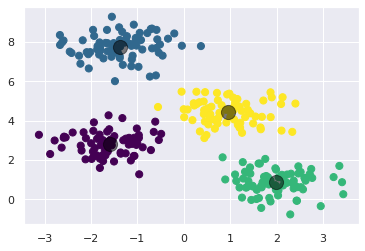

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

 ## *k*-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye.


# Basic implementation of K-Means from scratch

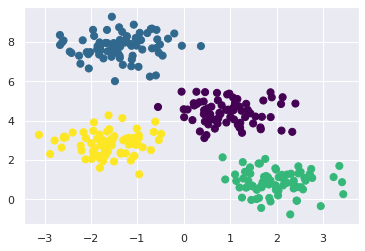

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    # Set the RandomState with the seed passed into this function as an argument
    state = np.random.RandomState(rseed)
    # Randomly select n_clusters row indices from X
    i = state.permutation(X.shape[0])[:n_clusters]
    # Assign those rows of X to the cluster centers
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check whether the centers have converged
        # If the old and new centers are the same, break the loop
        if np.all(centers == new_centers):
            break
        # Otherwise, set the old centers equal to the new centers and keep iterating
        centers = new_centers
    
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

#### Exercise: The globally optimal result may not be achieved
If we use a different random seed in our simple procedure, the particular starting guesses lead to poor results:

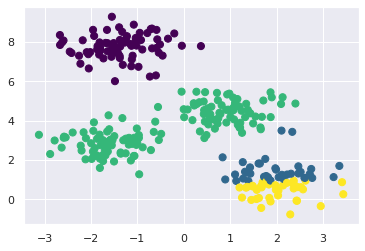

In [ ]:
### START CODE HERE ###
# Run your cluster-finding function as you did in the previous code cell, 
# but this time, set the random seed to 0
centers, labels = find_clusters(X, 4, rseed=0)
### END CODE HERE ###
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Here the K-Means has converged, but has not converged to a globally optimal configuration. For this reason, it is common for the algorithm to be run for multiple starting guesses, as indeed Scikit-Learn does by default (set by the ``n_init`` parameter, which defaults to 10).

#### Exercise: The number of clusters must be selected beforehand
If we ask the algorithm to identify six clusters, it will happily proceed and find the best six clusters which may not be the best clustering for further applications.

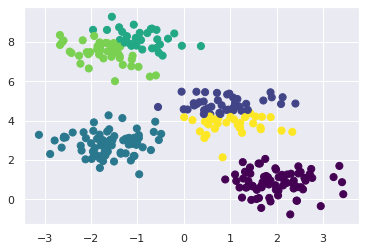

In [ ]:
# Train a KMeans classifier on X and predict new cluster labels from it
# Use 6 clusters and a random state of 0
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');